In [63]:
# Load iris dataset
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

data = {
    "weight": [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 5.14,
               4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69,
               6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 6.15, 5.80, 5.26],
    "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10
}
PlantGrowth = pd.DataFrame(data)

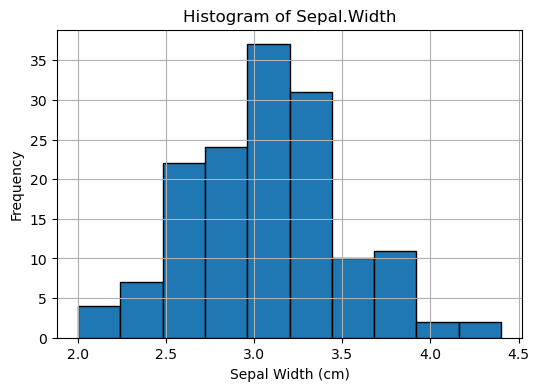

In [65]:
# 1a
plt.figure(figsize=(6,4))
plt.hist(iris_df["sepal width (cm)"], bins=10, edgecolor='black')
plt.title("Histogram of Sepal.Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [67]:
#1b
# Mean has fewer, higher value data.

In [69]:
# 1c
sepal_width_mean = iris_df["sepal width (cm)"].mean()
sepal_width_median = iris_df["sepal width (cm)"].median()

print("Mean:", round(sepal_width_mean, 2))
print("Median:", round(sepal_width_median, 2))

Mean: 3.06
Median: 3.0


In [71]:
# 1d
threshold = iris_df["sepal width (cm)"].quantile(0.73)
print("27% of the flowers have Sepal.Width higher than:", round(threshold, 2), "cm")

27% of the flowers have Sepal.Width higher than: 3.3 cm


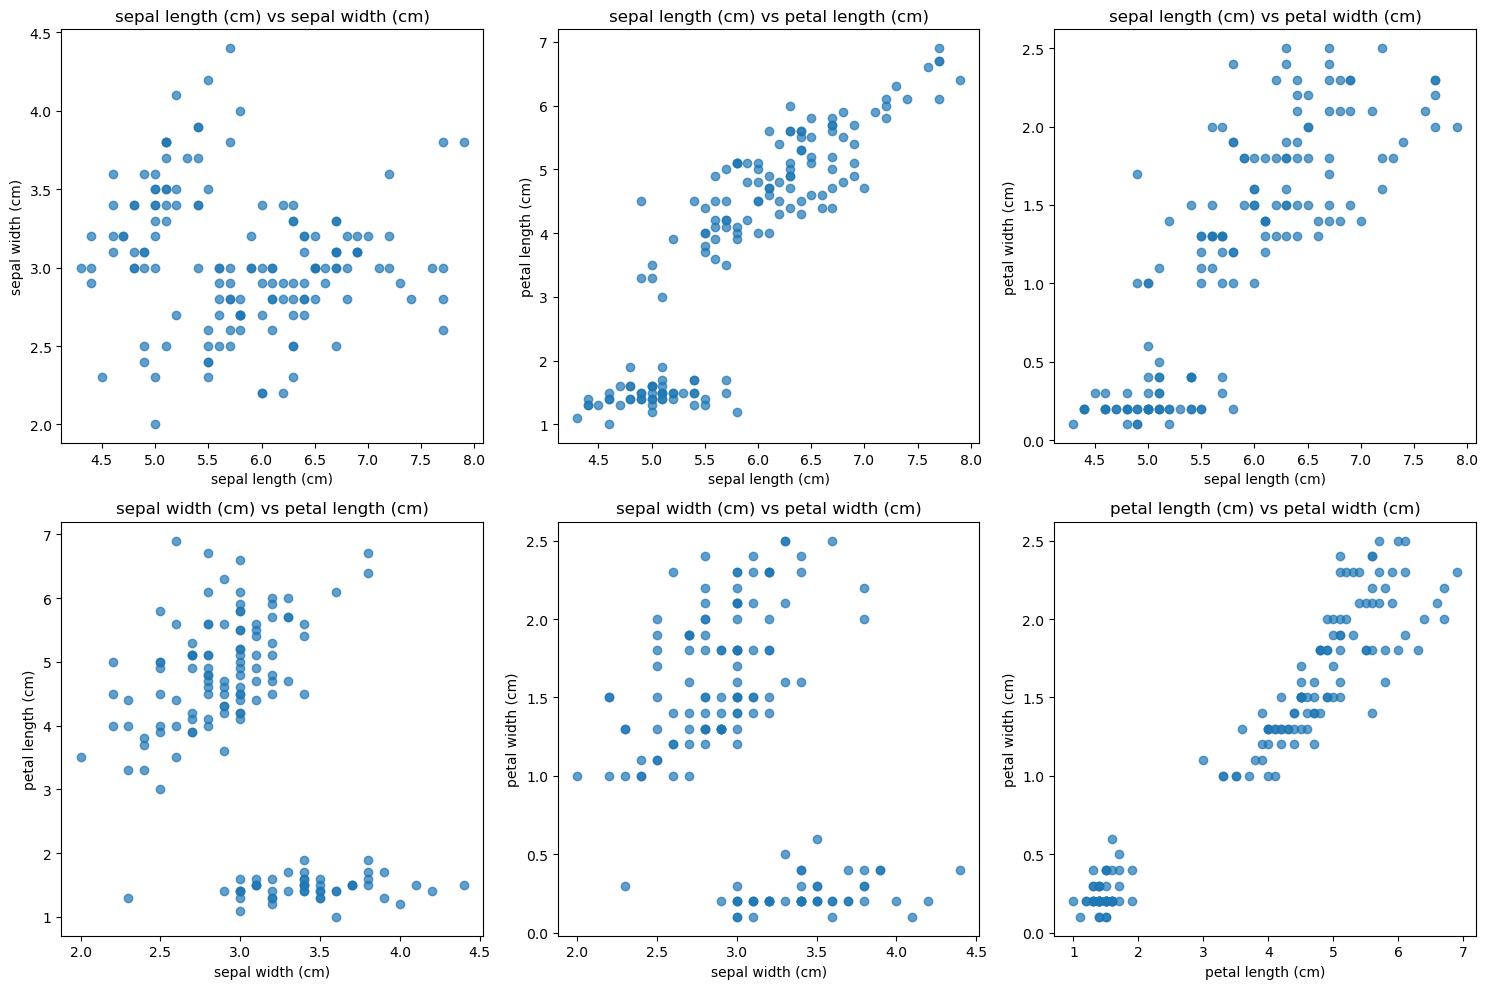

In [73]:
# 1e
from itertools import combinations

# Load iris data into DataFrame with proper column names
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Get all unique pairs of numerical variables (4 choose 2 = 6 pairs)
pairs = list(combinations(iris_df.columns, 2))

# Create a 2x3 grid for 6 plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, (x_var, y_var) in enumerate(pairs):
    axs[i].scatter(iris_df[x_var], iris_df[y_var], alpha=0.7)
    axs[i].set_xlabel(x_var)
    axs[i].set_ylabel(y_var)
    axs[i].set_title(f"{x_var} vs {y_var}")

plt.tight_layout()
plt.show()


In [75]:
# 1f

# Strongest relationship: Petal length (cm) and Petal width (cm): Correlation = 0.962865
# Weakest relationship: Sepal length (cm) and Sepal width (cm): Correlation = -0.117570

correlations = iris_df.corr(numeric_only=True)
print("Correlation Matrix:\n", correlations)

Correlation Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


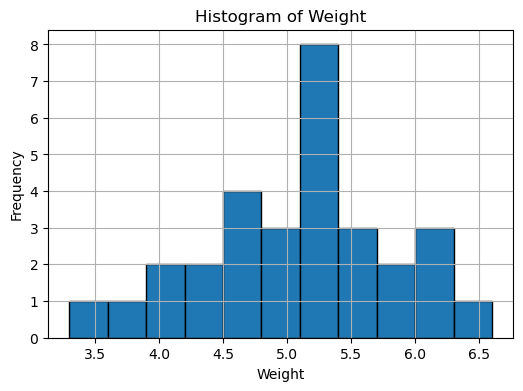

In [77]:
# 2g
bins = np.arange(3.3, PlantGrowth['weight'].max() + 0.3, 0.3)

plt.figure(figsize=(6,4))
plt.hist(PlantGrowth['weight'], bins=bins, edgecolor='black')
plt.title("Histogram of Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

C:\Users\rober\AppData\Local\Temp\ipykernel_20536\1049447097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y="weight", data=PlantGrowth, palette="Set2")


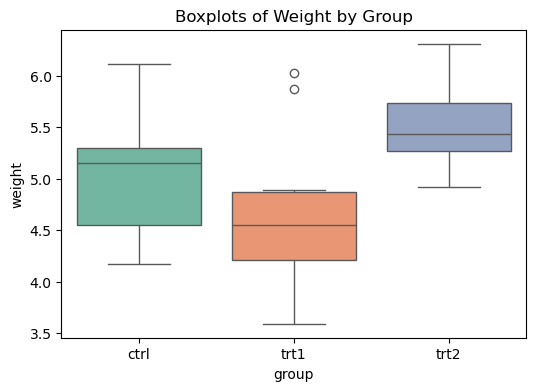

In [79]:
# 2h
plt.figure(figsize=(6,4))
sns.boxplot(x="group", y="weight", data=PlantGrowth, palette="Set2")
plt.title("Boxplots of Weight by Group")
plt.show()

In [81]:
# 2i
min_trt2 = PlantGrowth[PlantGrowth["group"] == "trt2"]["weight"].min()
below_min_trt2 = PlantGrowth[(PlantGrowth["group"] == "trt1") & (PlantGrowth["weight"] < min_trt2)]

estimated_percentage = (len(below_min_trt2) / len(PlantGrowth[PlantGrowth["group"] == "trt1"])) * 100
print("Estimated % of trt1 weights below min of trt2:", round(estimated_percentage, 2), "%")

Estimated % of trt1 weights below min of trt2: 80.0 %


In [83]:
# 2j
min_trt2 = PlantGrowth[PlantGrowth["group"] == "trt2"]["weight"].min()

# Get all rows in group 'trt1' where weight is less than min_trt2
below_min_trt2 = PlantGrowth[
    (PlantGrowth["group"] == "trt1") &
    (PlantGrowth["weight"] < min_trt2)
]

total_trt1 = len(PlantGrowth[PlantGrowth["group"] == "trt1"])
percentage_below = (len(below_min_trt2) / total_trt1) * 100

print("Exact % of trt1 weights below min of trt2:", round(percentage_below, 2), "%")

Exact % of trt1 weights below min of trt2: 80.0 %


C:\Users\rober\AppData\Local\Temp\ipykernel_20536\896439917.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="group", data=filtered, palette="Spectral")


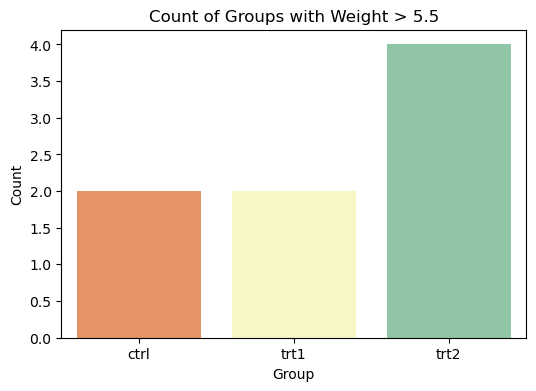

In [47]:
# 2k
filtered = PlantGrowth[PlantGrowth["weight"] > 5.5]

plt.figure(figsize=(6,4))
sns.countplot(x="group", data=filtered, palette="Spectral")
plt.title("Count of Groups with Weight > 5.5")
plt.xlabel("Group")
plt.ylabel("Count")
plt.show()